In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

% matplotlib inline

In [2]:
diabetes_data = pd.read_csv("/Users/nehasrivatsa/Downloads/diabetes.csv")

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot # python interface to graphviz dot language https://github.com/erocarrera/pydot
from os import system
from IPython.display import Image

In [75]:
tree_model = DecisionTreeClassifier(max_depth = 4)

In [76]:
X = diabetes_data.drop("Outcome", axis = 1)
y = diabetes_data['Outcome']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

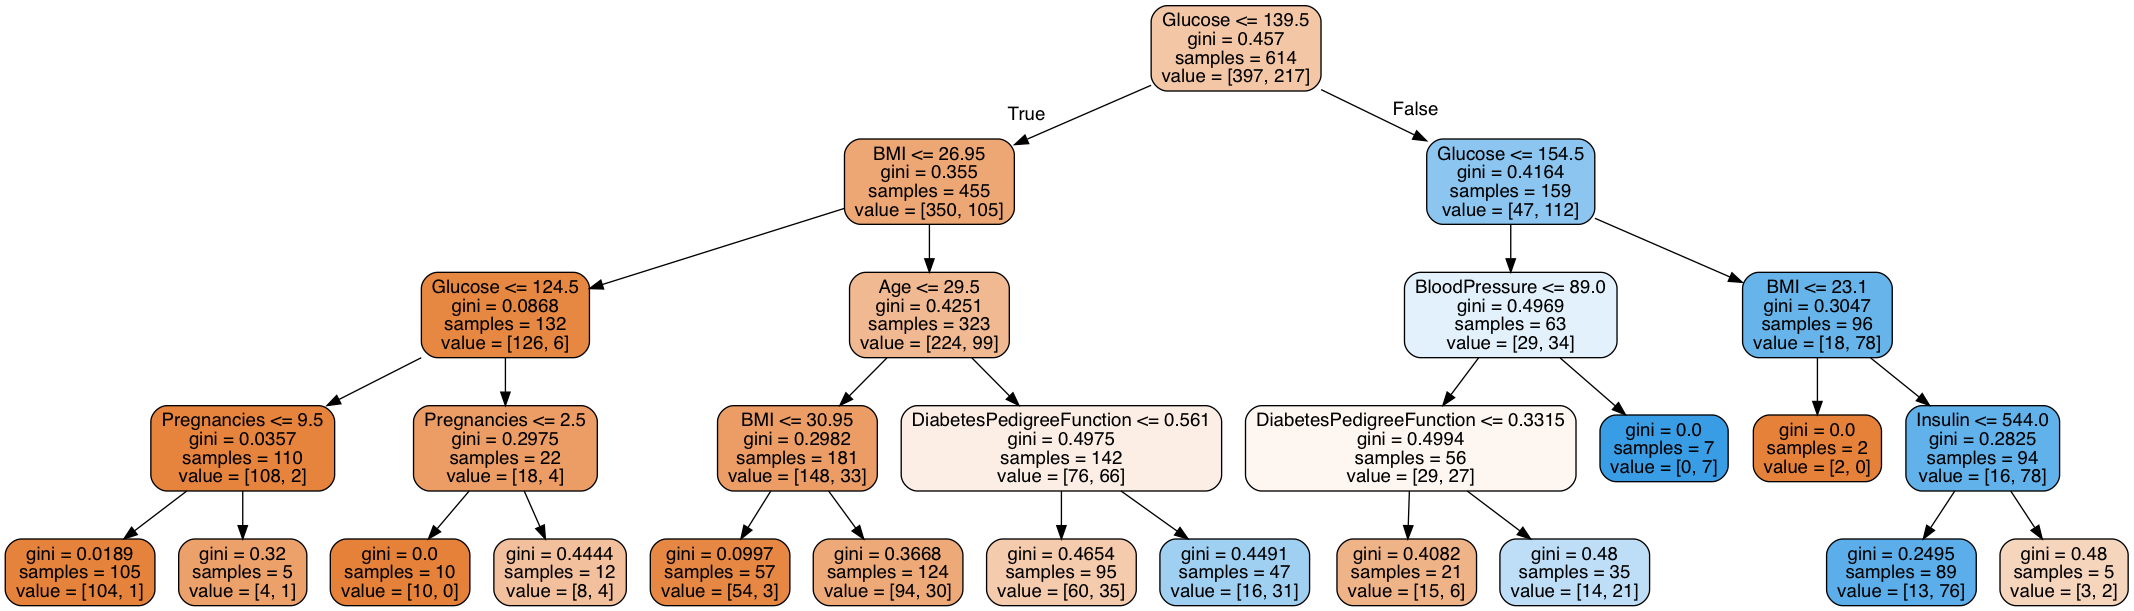

In [80]:
def show_tree(model):
    """Displays graphviz figure in notebook"""
    dot_data = StringIO()
    export_graphviz(model, 
                    out_file = dot_data, 
                    feature_names = X.columns, 
                    filled=True, 
                    rounded=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph[0].create_png())


def save_tree_image(model):
    """Saves graphviz figure in working directory"""    
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns)

    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
show_tree(tree_model)

In [81]:
features = X.columns
feature_importances = tree_model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,Glucose,0.565430
5,BMI,0.173568
7,Age,0.120654
6,DiabetesPedigreeFunction,0.075291
2,BloodPressure,0.031711


In [82]:
tree_predicts = tree_model.predict(X_test)

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, auc

In [84]:
roc_auc_score(y_test, tree_predicts)

0.7017894536455358

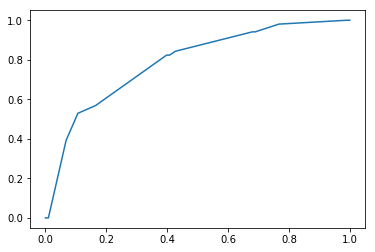

In [85]:
probas = tree_model.predict_proba(X_test)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1]);

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(y_test, tree_predicts)

0.74675324675324672

In [104]:
forest_model = RandomForestClassifier(n_estimators = 65)

In [105]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=65, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [106]:
forest_predicts = forest_model.predict(X_test)

In [121]:
forest_features = X.columns
forest_feature_importances = forest_model.feature_importances_
forest_features_df = pd.DataFrame({'Features': forest_features, 'Importance Score': forest_feature_importances})
forest_features_df.sort_values('Importance Score', inplace=True, ascending=False)

forest_features_df

,Features,Importance Score
1,Glucose,0.255877
5,BMI,0.177677
7,Age,0.127119
6,DiabetesPedigreeFunction,0.126361
2,BloodPressure,0.089272
0,Pregnancies,0.087223
3,SkinThickness,0.069912
4,Insulin,0.066559


In [108]:
roc_auc_score(y_test, forest_predicts)

0.78022082619455546

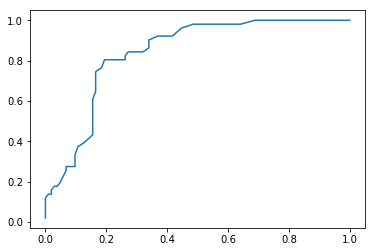

In [109]:
forest_probas = forest_model.predict_proba(X_test)
plt.plot(roc_curve(y_test, forest_probas[:,1])[0], roc_curve(y_test, forest_probas[:,1])[1]);

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test, forest_predicts)

0.79870129870129869

In [116]:
import seaborn as sns

In [117]:
conf = confusion_matrix(y_test, forest_predicts)

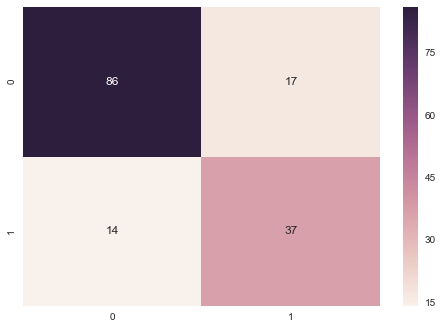

In [119]:
sns.heatmap(conf, annot = True)